In [1]:
import warnings
warnings.filterwarnings("ignore")
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import  TabularCPD
import networkx as nx
from matplotlib import pyplot as plt
# %matplotlib inline

In [2]:
model = BayesianModel([('D', 'G'),   # 一条有向边，D ---> G
                       ('I', 'G'),   # I ---> G
                       ('G', 'L'),   # G ---> L
                       ('I', 'S')])  # I ---> S
cpd_d=TabularCPD(variable="D",variable_card=2,values=[[0.6,0.4]])
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7, 0.3]])

cpd_g = TabularCPD(variable='G', variable_card=3,
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])
cpd_l = TabularCPD(variable='L', variable_card=2,
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])

cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],evidence_card=[2])



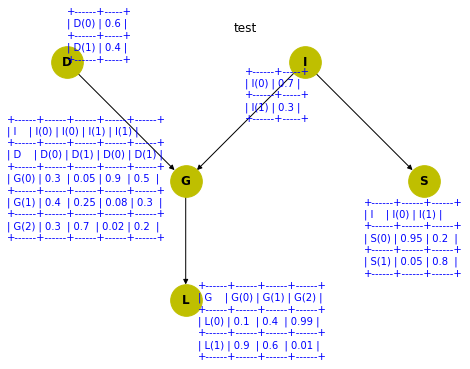

In [3]:
#将概率分布加入贝叶斯网络中
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)
model.check_model()
nx.draw(model,
        with_labels=True,
        node_size=1000,
        font_weight='bold',
        node_color='y',
        pos={"L": [4, 3], "G": [4, 5], "S": [8, 5], "D": [2, 7], "I": [6, 7]})

plt.text(2, 7, model.get_cpds("D"), fontsize=10, color='b')
plt.text(5, 6, model.get_cpds("I"), fontsize=10, color='b')
plt.text(1, 4, model.get_cpds("G"), fontsize=10, color='b')
plt.text(4.2, 2, model.get_cpds("L"), fontsize=10, color='b')
plt.text(7, 3.4, model.get_cpds("S"), fontsize=10, color='b')
plt.title('test')
plt.show()

In [4]:
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x19af0fa4400>,
 <TabularCPD representing P(I:2) at 0x19af0fa44a8>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x19af0fa4518>,
 <TabularCPD representing P(L:2 | G:3) at 0x19af0fa43c8>,
 <TabularCPD representing P(S:2 | I:2) at 0x19af0fa4550>]

In [5]:
print(model.get_cpds('G'))
model.get_cardinality('G')  # G节点可能的情况有几种（基数）

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


3

In [6]:
#已知数据集进行贝叶斯参数的估计
import pandas as pd
data = pd.DataFrame(data={'fruit': ["banana", "apple", "banana", "apple", "banana","apple", "banana", 
                                    "apple", "apple", "apple", "banana", "banana", "apple", "banana",], 
                          'tasty': ["yes", "no", "yes", "yes", "yes", "yes", "yes", 
                                    "yes", "yes", "yes", "yes", "no", "no", "no"], 
                          'size': ["large", "large", "large", "small", "large", "large", "large",
                                    "small", "large", "large", "large", "large", "small", "small"]})
data

,fruit,size,tasty
0,banana,large,yes
1,apple,large,no
2,banana,large,yes
3,apple,small,yes
4,banana,large,yes
5,apple,large,yes
6,banana,large,yes
7,apple,small,yes
8,apple,large,yes
9,apple,large,yes


In [7]:
from pgmpy.models import BayesianModel
model = BayesianModel([('fruit', 'tasty'), ('size', 'tasty')])
from pgmpy.estimators import ParameterEstimator
pr=ParameterEstimator(model,data)
print("\n",pr.state_counts("fruit"))


         fruit
apple       7
banana      7


In [8]:
#参数估计
from pgmpy.estimators import MaximumLikelihoodEstimator
mle=MaximumLikelihoodEstimator(model,data)
print("\n",mle.estimate_cpd("tasty"))
print("\n", mle.estimate_cpd('fruit'))

mle.get_parameters()
model.fit(data, estimator=MaximumLikelihoodEstimator)
print(model.get_cpds('fruit'))
print(model.get_cpds('size'))
print(model.get_cpds('tasty'))


 +------------+--------------+--------------------+---------------------+---------------+
| fruit      | fruit(apple) | fruit(apple)       | fruit(banana)       | fruit(banana) |
+------------+--------------+--------------------+---------------------+---------------+
| size       | size(large)  | size(small)        | size(large)         | size(small)   |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(no)  | 0.25         | 0.3333333333333333 | 0.16666666666666666 | 1.0           |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(yes) | 0.75         | 0.6666666666666666 | 0.8333333333333334  | 0.0           |
+------------+--------------+--------------------+---------------------+---------------+

 +---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| fruit(banana) | 0.5 |
+---------------+-----+
+---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| f

In [9]:
#变量估计
from pgmpy.inference import VariableElimination
infer=VariableElimination(model)
#查询单个变量的分布概率
print(infer.query(['tasty']))
print(infer.query(['tasty',"fruit"])) #计算联合分布概率
print(infer.map_query(['tasty'], evidence={'fruit': "apple", 'size': "large"})) 

Eliminating: size: 100%|██████████| 1/1 [00:00<00:00, 142.69it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------------+--------------+
| tasty      |   phi(tasty) |
+============+==============+
| tasty(no)  |       0.3393 |
+------------+--------------+
| tasty(yes) |       0.6607 |
+------------+--------------+
+------------+---------------+--------------------+
| tasty      | fruit         |   phi(tasty,fruit) |
+============+===============+====================+
| tasty(no)  | fruit(apple)  |             0.1369 |
+------------+---------------+--------------------+
| tasty(no)  | fruit(banana) |             0.2024 |
+------------+---------------+--------------------+
| tasty(yes) | fruit(apple)  |             0.3631 |
+------------+---------------+--------------------+
| tasty(yes) | fruit(banana) |             0.2976 |
+------------+---------------+--------------------+
{'tasty': 'yes'}


In [10]:
#贝叶斯结构学习
import pandas as pd
import numpy as np
from pgmpy.estimators import BdeuScore,K2Score,BicScore
from pgmpy.models import BayesianModel

data=pd.DataFrame(np.random.randint(0,4,size=(5000,2)),columns=list("XY"))
data["Z"]=data["X"]+data["Y"]
bdeu=BdeuScore(data,equivalent_sample_size=5)

model1 = BayesianModel([('X', 'Z'), ('Y', 'Z')])  # X -> Z <- Y
model2 = BayesianModel([('X', 'Z'), ('X', 'Y')])  # Y <- X -> Z
k2 = K2Score(data)
bic = BicScore(data)
print("-----model1的评分-----")
print(bdeu.score(model1))
print(k2.score(model1))
print(bic.score(model1))
print("-----model2的评分-----")
print(bdeu.score(model2))
print(k2.score(model2))
print(bic.score(model2))
print(bdeu.local_score('Z', parents=[]))
print(bdeu.local_score('Z', parents=['X']))
print(bdeu.local_score('Z', parents=['X', 'Y']))


ImportError: cannot import name 'BdeuScore'

In [ ]:
from pgmpy.estimators import HillClimbSearch

# create some data with dependencies
data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']

hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())



In [11]:
from pgmpy.independencies import Independencies
ind1 = Independencies(('A', ['B', 'C'], 'D'))
ind1.closure()

(A _|_ B | D)
(A _|_ C | D)
(A _|_ B | D, C)
(A _|_ C | D, B)
(A _|_ C, B | D)

In [ ]:
from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.estimators.CITests import chi_square, pearsonr
data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']
data['E'] *= data['F']

est = ConstraintBasedEstimator(data)

print(chi_square('B', 'H',[],data=est.data, state_names=est.state_names))
print(est.test_conditional_independence('B', 'H'))          # dependent
print(est.test_conditional_independence('B', 'E'))          # independent
print(est.test_conditional_independence('B', 'H', ['A']))   # independent
print(est.test_conditional_independence('A', 'G'))          # independent
print(est.test_conditional_independence('A', 'G',  ['H']))  # dependent
def is_independent(X, Y, Zs=[], significance_level=0.05):
    return chi_square(X, Y, Zs,data=est.data, state_names=est.state_names)[1] >= significance_level
        
print(is_independent('B', 'H'))
print(is_independent('B', 'E'))
print(is_independent('B', 'H', ['A']))
print(is_independent('A', 'G'))
print(is_independent('A', 'G', ['H']))


from pgmpy.estimators import MmhcEstimator

data = pd.DataFrame(np.random.randint(0, 3, size=(5500, 8)), columns=list('ABCDEFGH'))
data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']
data['E'] *= data['F']

mmhc = MmhcEstimator(data)
skeleton = mmhc.mmpc()
print("Part 1) Skeleton: ", skeleton.edges())
from pgmpy.estimators import BDeuScore
hc=HillClimbSearch(data,scoring_method=BdeuScore(data))
hc.estimate()